# <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%"> File Exploration </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Hierarchical Data Format (HDF)```, ```Data Loading```, ```Metadata```

# I. Introduction
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Background </div>


Plain text files (such as the ones we have worked with so far) are a straightforward and widely used way of storing and sharing data. Although there are several efforts towards standardization, in reality developers, vendors, practitioners
and other stakeholders are often driven to create their own data representation
formats, with well over 100+ documented formats targeting biosignals alone [1].
In this lesson our experiments will be centered around the loading and handling
of data stored in formats other than those we have previously used.

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/B.Graphical_User_Interface_IMG/b001/HDFView.png?raw=true" alt="HDFView" border="0">

## <div style="color:#00a0e4;"> 2. Objectives</div>
* Understand certain nuances that appear when dealing with biosignal data
recorded using tools other than the ones used to date
* Deepen your knowledge on the tools for data loading in Python
* Get familiar with binary data representation for storage of large data
volumes, in particular the Hierarchical Data Format (HDF)

## <div style="color:#00a0e4;"> 3. Materials </div>
* Anaconda Python 2.7
* GEMuseXMLReader for Python
* HDF5 for Python

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Embracing Diversity </div>

Until now we have worked with tab-delimited plain text ASCII files, with a header
automatically skipped when loading (due to the # prefix), followed by a sequence
of lines. This approach belongs to the family of delimiter-separated formats,
more widely known as Comma-Separated Values (CSV) file format, where the
basic concept is to have each line corresponding to a data record containing one
or more fields (e.g. sensor measurements), separated by a known delimitation
character. Due to its simplicity, it is a common data exchange format and widely
supported across end-user and professional software tools alike. However, there
are few conventions or standards, reason for which a plethora of variants is
usually found. In this experiment, we will learn how to adjust some of the file
loading options in order to cope with variations of the CSV files content:

    1. Download the file with sample ECG data available through the following link:
<a> <center>  https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/T06_29.csv </center></a>

    2. Inspect the file using a spreadsheet or text editor software of your liking, and observe how it differs from the previous format you have been working with

    3. Create a new (empty) Python script in the Spyder IDE

    4. Implement a program that loads the CSV file (using the loadtxt(...) function) and plots the TIMESTAMP (time in seconds since the beginning of the acquisition) against the A2 column (digital codes produced by the ADC for a given sensor output)

    5. Run your script and analize the output

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
   The first row of the file corresponds to the header formatted in a way
that will not be automatically skipped, the delimiter is the ; character,
and the number of columns is only the same from the third row onwards.
You’ll see that the loadtxt(...) function has options to handle these
variants, by reviewing the documentation found at:
      
<center> <a>https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.loadtxt.html   </a></center>
</div>

## <div style="color:#00a0e4;">  2. From Raw Measurements to Metadata </div>

While the CSV format is quite handy to store tabular data, it can quickly become quite restrictive especially in cases where, in addition to the core biosignal data, contextual information is included (e.g. patient data, acquisition system
specifications, experimental procedure information). To overcome these limitations, more recently the focus has shifted to more semantic approaches [1, 2, 3],
which enable the integration of disparate and heterogeneous sources of medical information and facilitate their query and retrieval. One such approach is based on markup languages, using a set of rules for encoding documents in a
format that is both human-readable and machine-readable, of which eXtensible
Markup Language (XML) is arguably the most widely adopted. In this experiment we will analyse a real-world case of files recorded by a medical-grade Electrocardiograph (ECG):

    1. Download the file with sample ECG data available through the following link:
    
<center> <a> https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/0000001A.XML</a> </center>

    2. Browse the file to inspect its content using an XML viewer, e.g., the following online tool:
<center> <a> http://www.xmlviewer.org/</a> </center>

    3. As you can see, different types of information (e.g. type of equipment, filters, interpretation, etc.) are stored on the file, together with the ECG waveforms for different leads, as a hierarchical set of human-readable groupings; use the Tree View option to see a better visual representation of the file content

    4. Download the GEMuseXMLReader module from:
<a><center> https://github.com/DFNOsorio/GEMuseXMLReader </center></a>

    5. Extract the files and move the content to a working directory of your pref-
    erence (alternatively you can add the containing folder to the PYTHONPATH manager on Spyder)

    6. Download the xmltodict module from:
<a><center>  https://github.com/martinblech/xmltodict </center></a>

    7. Extract the files and move the content to a working directory of your preference (alternatively you can add the containing folder to the PYTHONPATH manager on Spyder)

    8. Create a new (empty) Python script in the Spyder IDE
    
    9. Copy the code snippet shown in Figure 10.1 to your script

    10. Run your script and analize the output; you should see a plot corresponding to the raw Lead I ECG data
    
    
<br>
    
Example code to read ECG waveform data stored in the GE MUSE XML format:

In [5]:
import pylab as pl
from GEMuseXMLReader import *

GEMuseData = GEMuseXMLReader('0000001A.XML')

pl.figure()
pl.plot(GEMuseData.dataObject['I'])
pl.show()

ModuleNotFoundError: No module named 'GEMuseXMLReader'

Example code for direct access to the Lead I ECG data stored in the GE MUSE XML format (optional exercise):

In [ ]:
GEMuseData.dataObject={}
GEMuseData.dataObject['I']= array(GEMuseData.dic['sapphire']['dcarRecord']['patientInfo']['visit']['order']['ecgResting']['
params']['ecg']['wav']['ecgWaveformMXG']['ecgWaveform'][0]['@V'].split()).astype('int')

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
If you are obtaining an AttributeError: GEMuseXMLReader instance
has no attribute ’dataObject’ add the code shown in Figure 10.2
immediately before the pl.figure() line.
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can learn more about XML through the documentation available at:
<center><a> https://www.w3schools.com/xml/xml_whatis.asp   </a></center>
</div>

###  **JSON** 

JavaScript Object Notation is often an advantageous format as well. It's a lightweight format for storing and transporting data, much used when data is sent from a server to a web page.

The code that follows demonstrates how to open a JSON file in Python.

In [4]:
with open(r'../_Resources/observation-example-sample-data.json', 'r') as f:  
    print(f.read()) 

{
  "resourceType": "Observation",
  "id": "ekg",
  "text": {
    "status": "generated",
    "div": "<div xmlns=\"http://www.w3.org/1999/xhtml\"><p><b>Generated Narrative with Details</b></p><p><b>id</b>: ekg</p><p><b>status</b>: final</p><p><b>category</b>: Procedure <span>(Details : {http://terminology.hl7.org/CodeSystem/observation-category code 'procedure' = 'Procedure', given as 'Procedure'})</span></p><p><b>code</b>: MDC_ECG_ELEC_POTL <span>(Details : {urn:oid:2.16.840.1.113883.6.24 code '131328' = '131328', given as 'MDC_ECG_ELEC_POTL'})</span></p><p><b>subject</b>: <a>P. van de Heuvel</a></p><p><b>effective</b>: 19/02/2015 9:30:35 AM</p><p><b>performer</b>: <a>A. Langeveld</a></p><p><b>device</b>: 12 lead EKG Device Metric</p><blockquote><p><b>component</b></p><p><b>code</b>: MDC_ECG_ELEC_POTL_I <span>(Details : {urn:oid:2.16.840.1.113883.6.24 code '131329' = '131329', given as 'MDC_ECG_ELEC_POTL_I'})</span></p><p><b>value</b>: Origin: (system = '[not stated]' code null = 'null

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can learn more about JSON through the documentation available at:
<center><a> https://www.json.org/json-en.html  </a></center>
</div>

###  **TXT** 

(22350, 6)
[[  1.   1.   1.   0.   0. 496.]
 [  2.   1.   1.   0.   0. 496.]
 [  3.   1.   1.   0.   0. 497.]
 ...
 [ 12.   1.   1.   1.   0. 496.]
 [ 13.   1.   1.   1.   0. 497.]
 [ 14.   1.   1.   1.   0. 498.]]


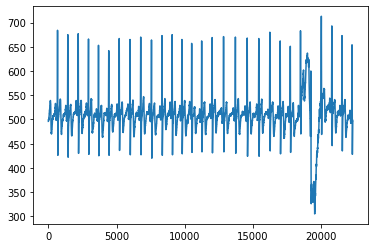

In [45]:
fname = '../_Resources/SampleECG.txt'

raw = pl.loadtxt(fname)
print(raw.shape)
print(raw)

data = raw[:, 5]

pl.figure()
pl.plot(data)
pl.show()

###  **Table from CSV** 

In [3]:
import pylab as pl

fname = '../X.Example_Files/SUS_Calculation.csv'

raw = pl.loadtxt(fname, skiprows = 1, delimiter = ';')
print(raw.shape)
print(raw)

odd = pl.sum(raw[:,0::2]-1, 1)
even = pl.sum(5-raw[:,1::2], 1)

scoreSUS = (odd+even)*2.5
print(scoreSUS)

(5, 10)
[[1. 5. 1. 5. 1. 5. 1. 5. 1. 5.]
 [2. 4. 2. 4. 2. 4. 2. 4. 2. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 2. 4. 2. 4. 2. 4. 2. 4. 2.]
 [5. 1. 5. 1. 5. 1. 5. 1. 5. 1.]]
[  0.  25.  50.  75. 100.]


## <div style="color:#00a0e4;">   3. Going Beyond Plain Text - HDF5 </div>

Regardless of having a semantic-driven organization (e.g. like in XML) or not
(e.g. like in CSV), plain text formats are prone to performance issues when large
volumes of data are being dealt with. For example a measurement sampled by
an ADC with 10-bit resolution (e.g. 1023) stored as human-readable plain text
takes up at least 32 bits (i.e. 8-bit per digit). Although often sacrificing the semantics, to overcome this issue, several binary formats for biosignal data storage
have been proposed, examples of which are the Extensible Biosignal File Format
(EBS) [4], the European Data Format (EDF+) [5], the Medical Waveform Format Encoding Rules (MFER) [6], and the WaveForm DataBase (WFDB) [7].
A compromise solution between performance and semantics appeared recently
in the form of the Hierarchical Data Format (HDF), a self-describing format
designed to store and organize large amounts of data [8]; the file structure has
a hierarchical nature, based on two major types of objects: Datasets (multidimensional arrays of a homogeneous type), and Groups (container structures
which can hold datasets and other groups). In this exercise we will get familiar
with the HDF5 file format:

    1. Download and install the HDFView visualizer:
<a><center> https://support.hdfgroup.org/products/java/release/download.html  </center></a>

    2. Download the file with sample data stored in HDF5 available at:
<a><center> https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/000780B383D5.h5  </center></a>

    3. Open the file with sample data on the HDFView software and explore its content

    4. As you can see, the content is stored in a hierarchical way, with each node of the tree storing metadata and the leafs corresponding to either time series or other relevant data from the recording session

    5. Create a new (empty) Python script in the Spyder IDE

    6. Copy the code snippet shown in Figure 10.3 to your script; note how the HDF5 file content is loaded (in Python at least) as a dictionary-like structure

    7. Run your script and analize the output; you should see a plot corresponding to raw ECG data (acquired from channel 2)
    
<br>

Example code to read a ECG time series stored in the example HDF5, plotting in on a chart and displaying some of the metadata on the console:

['00:07:80:B3:83:D5']
<KeysViewHDF5 ['digital', 'events', 'plugin', 'raw', 'support']>
<KeysViewHDF5 ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'nSeq']>


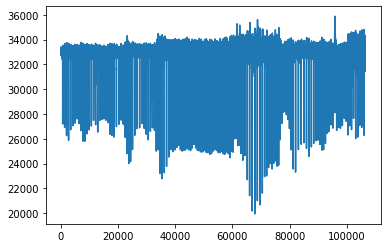

In [66]:
import pylab as pl
import h5py

HDFData = h5py.File('../_Resources/000780B383D5.h5','r')

keys = list(HDFData.keys())
print(keys)

root = HDFData[keys[0]]
print(root.keys())

raw = root['raw']
print(raw.keys())

data = raw['channel_2']

pl.figure()
pl.plot(data)
pl.show()

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    More information about the HDF file format can be found at:

<center><a> https://www.hdfgroup.org/solutions/hdf5/  </a></center>
</div>

# III. Explore
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


###  1. Quiz  
1. Using the information available from the file used in Section II.1., what was the sampling rate used for data acquisition?
    
2. Based on your current knowledge about the typical traces of the most commonly used biosignals, which column contains Electrodermal Activity (EDA) sensor data in the file used in Section II.I? Explain how you reached your conclusion?
    
3. Modify the script used in Section II.2. to plot, in a single figure, the data for all the waveforms stored on file arranged in a grid and duly labelled. Show the obtained result.
    
4. Expand the script used in Section II.2. to determine and print to the console the average heart rate on the recording session with the support of the BioSPPy toolbox (e.g. based on Lead I data).
    
5. Create a new program using the learnings from the exercise of Section II.3. to automatically traverse and print to the console the tree structure with the HDF5 file content

## <div style="color:#00a0e4;">  2. Further Reading  </div>

[1] D. Brooks, P. Hunter, B. Smaill, and M. Titchener, “BiosignalML - a meta-
model for biosignals,” in Eng. in Medicine and Biology Society,EMBC, 2011
Annual International Conference of the IEEE, 2011, pp. 5670 –5673.

[2] A. Kokkinaki, I. Chouvarda, and N. Maglaveras, “An ontology-based ap-
proach facilitating unified querying of biosignals and patient records,” in
Eng. in Medicine and Biology Society, 2008. EMBS 2008. 30th Annual In-
ternational Conference of the IEEE, aug. 2008, pp. 2861 –2864.

[3] D. Brooks, “Extensible biosignal metadata a model for physiological time-
series data,” in Eng. in Medicine and Biology Society, 2009. EMBC 2009.
Annual International Conference of the IEEE, 2009, pp. 3881 –3884.

[4] G. Hellmann, M. Kuhn, M. Prosch, and M. Spreng, “Extensible
biosignal (EBS) file format: simple method for eeg data exchange,”
Electroencephalography and Clinical Neurophysiology, vol. 99, no. 5, pp. 426
– 431, 1996. [Online]. Available: http://www.sciencedirect.com/science/article/pii/S0013469496965025

[5] B. Kemp and J. Olivan, “European data format plus (EDF+), an edf
alike standard format for the exchange of physiological data,” Clinical
Neurophysiology, vol. 114, no. 9, pp. 1755 – 1761, 2003. [Online]. Available:
http://www.sciencedirect.com/science/article/pii/S1388245703001238

[6] MFER, “Medical waveform format encoding rules,”
http://ecg.heart.or.jp/En/Index.htm, 2003. [Online]. Available: http://ecg.heart.or.jp/En/Index.htm

[7] A. L. Goldberger, L. A. N. Amaral, L. Glass, J. M. Hausdorff, P. C. Ivanov,
R. G. Mark, J. E. Mietus, G. B. Moody, C.-K. Peng, and H. E. Stanley,
“PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research
resource for complex physiologic signals,” Circulation, vol. 101, no. 23, pp.
e215–e220, 2000.

[8] HDF, “The HDF group. Hierarchical data format version 5, 2000-2010.”
www.hdfgroup.org/HDF5, 2010. [Online]. Available: www.hdfgroup.org/HDF5/

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> [here](https://forms.gle/C8TdLQUAS9r8BNJM8)</span>.</span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. Hugo Silva; Joana Pinto```